<a href="https://colab.research.google.com/github/Zeeshan-Imran-Hub/Linear-Regression-Model/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors
0    313000         3       1.50         1340      7912     1.5
1   2384000         5       2.50         3650      9050     2.0
2    342000         3       2.00         1930     11947     1.0
3    420000         3       2.25         2000      8030     1.0
4    550000         4       2.50         1940     10500     1.0
..      ...       ...        ...          ...       ...     ...
94   524000         3       1.75         1560      5520     1.0
95   541125         5       2.75         2740      8426     1.0
96   670000         3       2.50         1680      2000     3.0
97   384900         5       2.50         3090     12750     1.0
98   406100         3       2.25         1410      1332     3.0

[99 rows x 6 columns]
Cost: 0.1404460295345246
Theta: [1.7322002418299282e-17, 0.1473297017511481, 0.2337922622174031, -0.068116371343118, 0.0735276013223823, 0.14198033534019588]
Cost: 0.004911160460047132


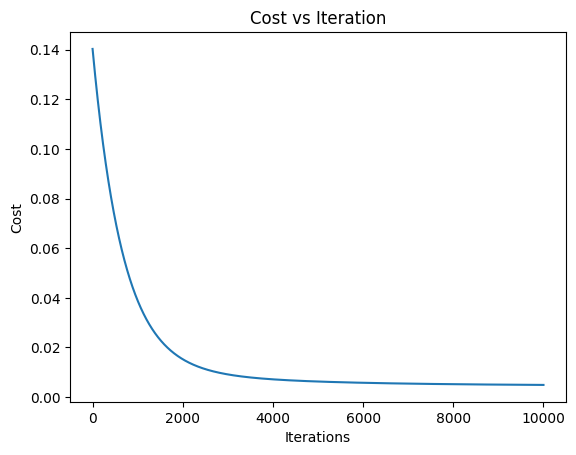

'\ninitial_hypothesis = hypothesis(initial_theta, x_norm)\nfinal_hypothesis = hypothesis(theta, x_norm)\n\nplt.scatter(x_norm,y_norm, label=\'Data\',color =\'b\')\nplt.plot(x_norm, initial_hypothesis, label=\'Initial Hypothesis\', color=\'r\')\nplt.plot(x_norm, final_hypothesis, label=\'Final Hypothesis\', color=\'g\')\nplt.title(\'House Price Prediction\')\nplt.xlabel("Sqrt_Living (Normalized)")\nplt.ylabel("Price (Normalized)")\nplt.legend()\nplt.show()\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/data_mod.csv")

print(df)

x1 = df['sqft_living'].values
x2 = df['bedrooms'].values
x3 = df['bathrooms'].values
x4 = df['sqft_lot'].values
x5 = df['floors'].values

y = df['price'].values

#print("Vector x:", x)
#print("Vector y:", y)

def hypothesis(theta, x1, x2, x3, x4, x5):
  return (theta[0] + (x1 * theta[1]) + (x2 * theta[2]) + (x3 * theta[3]) + (x4 * theta[4]) + (x5 * theta[5]))


def cost_calculator(x1, x2, x3, x4, x5, y, theta):
    m = len(y)
    predictions = hypothesis(theta, x1, x2, x3, x4, x5)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

def normalize_vector(vect):
    return (vect - np.mean(vect)) / np.max(vect)


def gradient_decent_algo(alpha, x1, x2, x3, x4, x5, y, theta):
  m = len(y)
  predictions = hypothesis(theta, x1, x2, x3, x4, x5)
  errors = predictions - y
  theta[0] = (theta[0]-((alpha*np.sum(errors))/m))
  theta[1] = (theta[1]-((alpha*np.sum(errors*x1))/m))
  theta[2] = (theta[2]-((alpha*np.sum(errors*x2))/m))
  theta[3] = (theta[3]-((alpha*np.sum(errors*x3))/m))
  theta[4] = (theta[4]-((alpha*np.sum(errors*x4))/m))
  theta[5] = (theta[5]-((alpha*np.sum(errors*x5))/m))
  return theta



x1_norm = normalize_vector(x1)
x2_norm = normalize_vector(x2)
x3_norm = normalize_vector(x3)
x4_norm = normalize_vector(x4)
x5_norm = normalize_vector(x5)

y_norm = normalize_vector(y)

theta = [0, 1, 1, 1, 1, 1]
cost = cost_calculator(x1_norm, x2_norm, x3_norm, x4_norm, x5_norm, y_norm, theta)
print("Cost:", cost)
alpha = 0.01
iterations = 10000

cost_history = []
for _ in range(iterations):
    theta = gradient_decent_algo(alpha, x1_norm, x2_norm, x3_norm, x4_norm, x5_norm, y_norm, theta)
    cost = cost_calculator(x1_norm, x2_norm, x3_norm, x4_norm, x5_norm, y_norm, theta)
    cost_history.append(cost)


print("Theta:", theta)
cost_calculator(x1_norm, x2_norm, x3_norm, x4_norm, x5_norm, y_norm, theta)
print("Cost:", cost)

initial_theta= [0,1]



plt.plot(range(1, iterations + 1), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title('Cost vs Iteration')
plt.show()

'''
initial_hypothesis = hypothesis(initial_theta, x_norm)
final_hypothesis = hypothesis(theta, x_norm)

plt.scatter(x_norm,y_norm, label='Data',color ='b')
plt.plot(x_norm, initial_hypothesis, label='Initial Hypothesis', color='r')
plt.plot(x_norm, final_hypothesis, label='Final Hypothesis', color='g')
plt.title('House Price Prediction')
plt.xlabel("Sqrt_Living (Normalized)")
plt.ylabel("Price (Normalized)")
plt.legend()
plt.show()
'''

